In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [4]:
# Load the Data

data = pd.read_csv("global_cancer_patients_2015_2024.csv")

In [5]:
data

,Patient_ID,Age,Gender,Country_Region,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
0,PT0000000,71,Male,UK,2021,6.4,2.8,9.5,0.9,8.7,Lung,Stage III,62913.44,5.9,4.92
1,PT0000001,34,Male,China,2021,1.3,4.5,3.7,3.9,6.3,Leukemia,Stage 0,12573.41,4.7,4.65
2,PT0000002,80,Male,Pakistan,2023,7.4,7.9,2.4,4.7,0.1,Breast,Stage II,6984.33,7.1,5.84
3,PT0000003,40,Male,UK,2015,1.7,2.9,4.8,3.5,2.7,Colon,Stage I,67446.25,1.6,3.12
4,PT0000004,43,Female,Brazil,2017,5.1,2.8,2.3,6.7,0.5,Skin,Stage III,77977.12,2.9,3.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,PT0049995,80,Male,Pakistan,2023,2.3,7.5,2.8,3.8,2.9,Leukemia,Stage 0,71463.70,1.0,3.63
49996,PT0049996,40,Female,USA,2018,6.4,3.5,2.9,9.0,9.8,Colon,Stage I,49619.66,0.4,6.03
49997,PT0049997,74,Male,Pakistan,2015,6.2,1.6,8.7,4.7,4.0,Breast,Stage 0,5338.25,2.7,6.02
49998,PT0049998,21,Male,Brazil,2018,4.0,6.5,7.6,8.6,8.1,Liver,Stage IV,45100.47,7.5,6.54


In [8]:
# understand the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Patient_ID             50000 non-null  object 
 1   Age                    50000 non-null  int64  
 2   Gender                 50000 non-null  object 
 3   Country_Region         50000 non-null  object 
 4   Year                   50000 non-null  int64  
 5   Genetic_Risk           50000 non-null  float64
 6   Air_Pollution          50000 non-null  float64
 7   Alcohol_Use            50000 non-null  float64
 8   Smoking                50000 non-null  float64
 9   Obesity_Level          50000 non-null  float64
 10  Cancer_Type            50000 non-null  object 
 11  Cancer_Stage           50000 non-null  object 
 12  Treatment_Cost_USD     50000 non-null  float64
 13  Survival_Years         50000 non-null  float64
 14  Target_Severity_Score  50000 non-null  float64
dtypes:

In [10]:
# duplicate checking
data.duplicated().sum()

np.int64(0)

# Descriptive Analysis

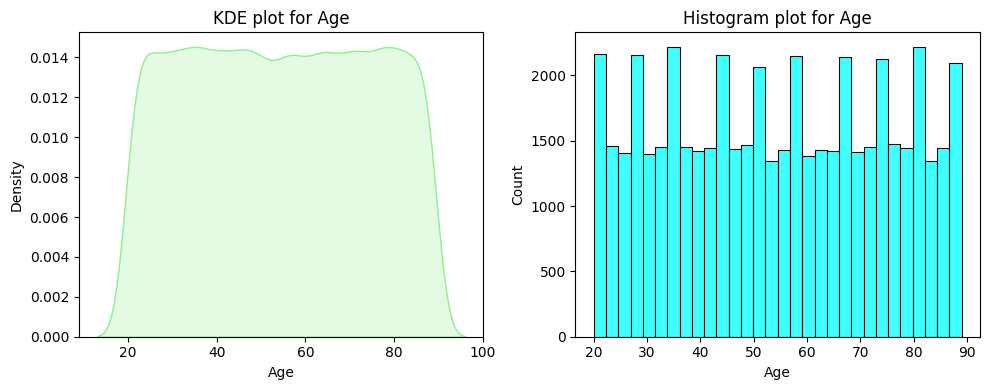

In [12]:
# Plotting for age column
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.kdeplot(data['Age'],fill=True, color='lightgreen')
plt.title("KDE plot for Age")

plt.subplot(1,2,2)
sns.histplot(data['Age'], bins=30, kde=False,color='cyan')
plt.title("Histogram plot for Age")

plt.tight_layout()
plt.show()



In [14]:
# understand from data ---> notes
data['Age'].describe()

count    50000.000000
mean        54.421540
std         20.224451
min         20.000000
25%         37.000000
50%         54.000000
75%         72.000000
max         89.000000
Name: Age, dtype: float64

In [21]:
data["Gender"].value_counts()

Gender
Male      16796
Female    16709
Other     16495
Name: count, dtype: int64

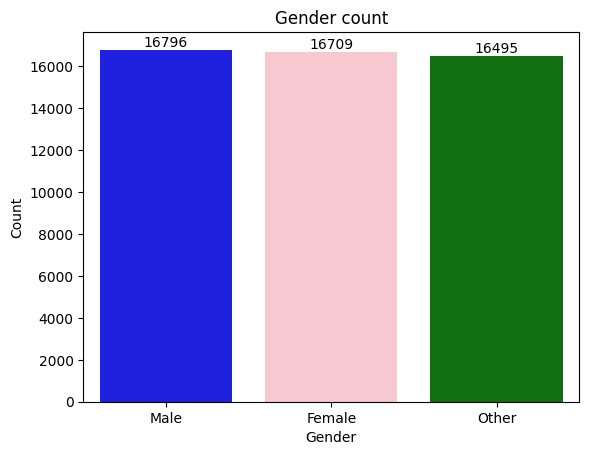

In [20]:
data["Gender"].value_counts()

sns.barplot(x=data["Gender"].value_counts().index,
           y=data["Gender"].value_counts().values,
           palette=["blue","pink",'green']
           )

for i, v in enumerate(data["Gender"].value_counts()):
    plt.text(i,v,str(v), ha="center", va="bottom")

plt.title("Gender count")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

# The dataset contains three gender categories with the most common being male(16796).Gender distribution 
# is sufficient for evaluating gender specific survival trends and severity outcomes

In [22]:
# countries columns
data['Country_Region'].value_counts()

Country_Region
Australia    5092
UK           5060
USA          5060
India        5040
Germany      5024
Russia       5017
Brazil       5004
Pakistan     4926
China        4913
Canada       4864
Name: count, dtype: int64

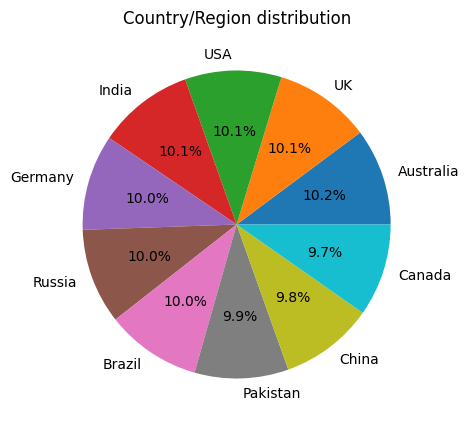

In [26]:
# pie chart
country_counts = data['Country_Region'].value_counts()

plt.figure(figsize=(5,5))
plt.pie(
    x=country_counts.values,
    labels=country_counts.index,
    autopct='%1.1f%%'
)

plt.title("Country/Region distribution")
plt.show()



In [29]:
# cancer type
data['Cancer_Type'].value_counts()

Cancer_Type
Colon       6376
Prostate    6308
Leukemia    6266
Liver       6249
Skin        6231
Cervical    6222
Breast      6189
Lung        6159
Name: count, dtype: int64

Text(0, 0.5, 'counts')

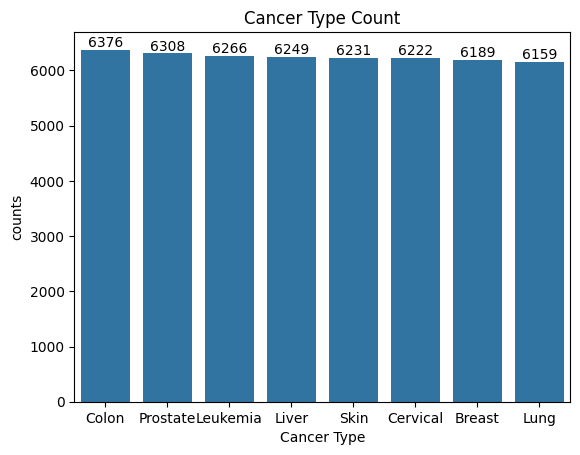

In [32]:
data['Cancer_Type'].value_counts()

sns.barplot(x=data['Cancer_Type'].value_counts().index,
           y=data['Cancer_Type'].value_counts().values)

for i,v in enumerate(data['Cancer_Type'].value_counts()):
    plt.text(i,v, str(v), ha="center", va="bottom")

plt.title("Cancer Type Count")
plt.xlabel('Cancer Type')
plt.ylabel("counts")

# inference
### Based on the bar chart generated:
### You can clearly see which cancer type is most common in your dataset.
### The cancer type with the highest bar has the largest number of patients.
### The cancer types with small bars are relatively rare.
### This shows how your dataset is distributed across different cancer categories.
### If one cancer type dominates (very high count), the dataset may be imbalanced, which is important for analysis and modeling.
### The count labels help identify exact patient numbers for each category.

In [34]:
data['Cancer_Stage'].value_counts()

Cancer_Stage
Stage II     10124
Stage I      10046
Stage III    10008
Stage IV      9933
Stage 0       9889
Name: count, dtype: int64

Text(0, 0.5, 'counts')

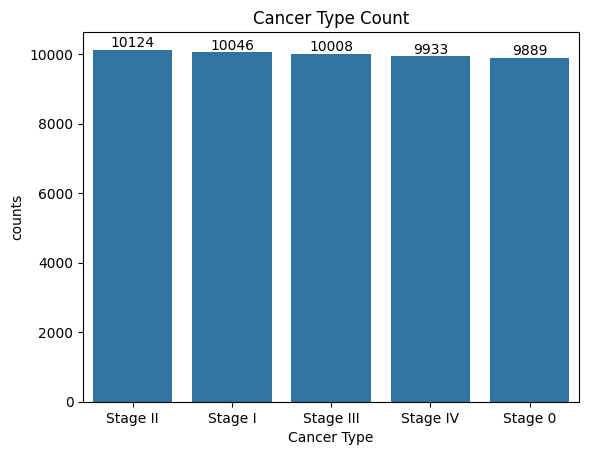

In [35]:
# Cancer stage
data['Cancer_Stage'].value_counts()

sns.barplot(x=data['Cancer_Stage'].value_counts().index,
           y=data['Cancer_Stage'].value_counts().values)

for i,v in enumerate(data['Cancer_Stage'].value_counts()):
    plt.text(i,v, str(v), ha="center", va="bottom")

plt.title("Cancer Type Count")
plt.xlabel('Cancer Type')
plt.ylabel("counts")

# The cancer stage distribution is very balanced, with all stages having almost equal representation. This ensures unbiased analysis and allows reliable comparisons between early (Stage 0–I) and advanced stages (Stage III–IV).

In [39]:
# Economic cost 
data['Treatment_Cost_USD'].describe()

count    50000.000000
mean     52467.298239
std      27363.229379
min       5000.050000
25%      28686.225000
50%      52474.310000
75%      76232.720000
max      99999.840000
Name: Treatment_Cost_USD, dtype: float64

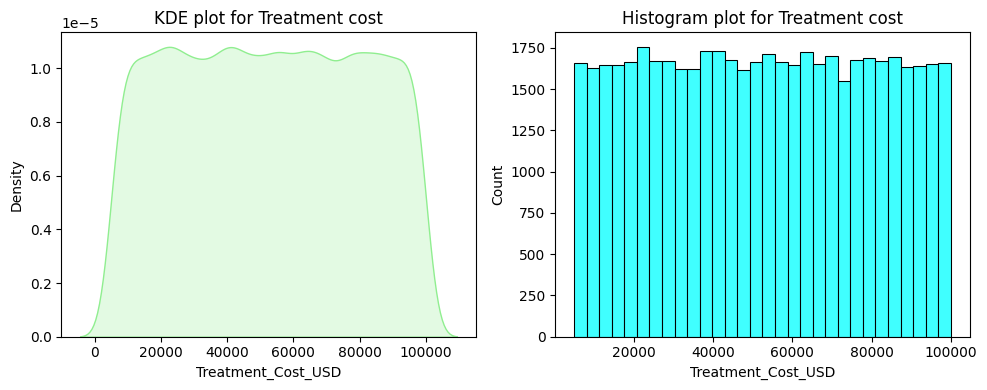

In [38]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.kdeplot(data['Treatment_Cost_USD'],fill=True, color='lightgreen')
plt.title("KDE plot for Treatment cost")

plt.subplot(1,2,2)
sns.histplot(data['Treatment_Cost_USD'], bins=30, kde=False,color='cyan')
plt.title("Histogram plot for Treatment cost")

plt.tight_layout()
plt.show()


# reatment costs in the dataset are centered around $52,000, but vary widely between $5,000 and $100,000. Most patients fall in the mid-range cost group, while a smaller portion experiences very high or very low treatment costs.

In [48]:
# Analyzing the risk factors
column_of_intrest = ['Genetic_Risk','Air_Pollution','Alcohol_Use','Smoking','Obesity_Level']
summary = data[column_of_intrest].agg(['mean',"std",'max','min'])
summary

,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level
mean,5.001698,5.010126,5.010880,4.989826,4.991176
std,2.885773,2.888399,2.888769,2.881579,2.894504
max,10.000000,10.000000,10.000000,10.000000,10.000000
min,0.000000,0.000000,0.000000,0.000000,0.000000


# 1 - Determine the relationship between risk factors and cancer severity

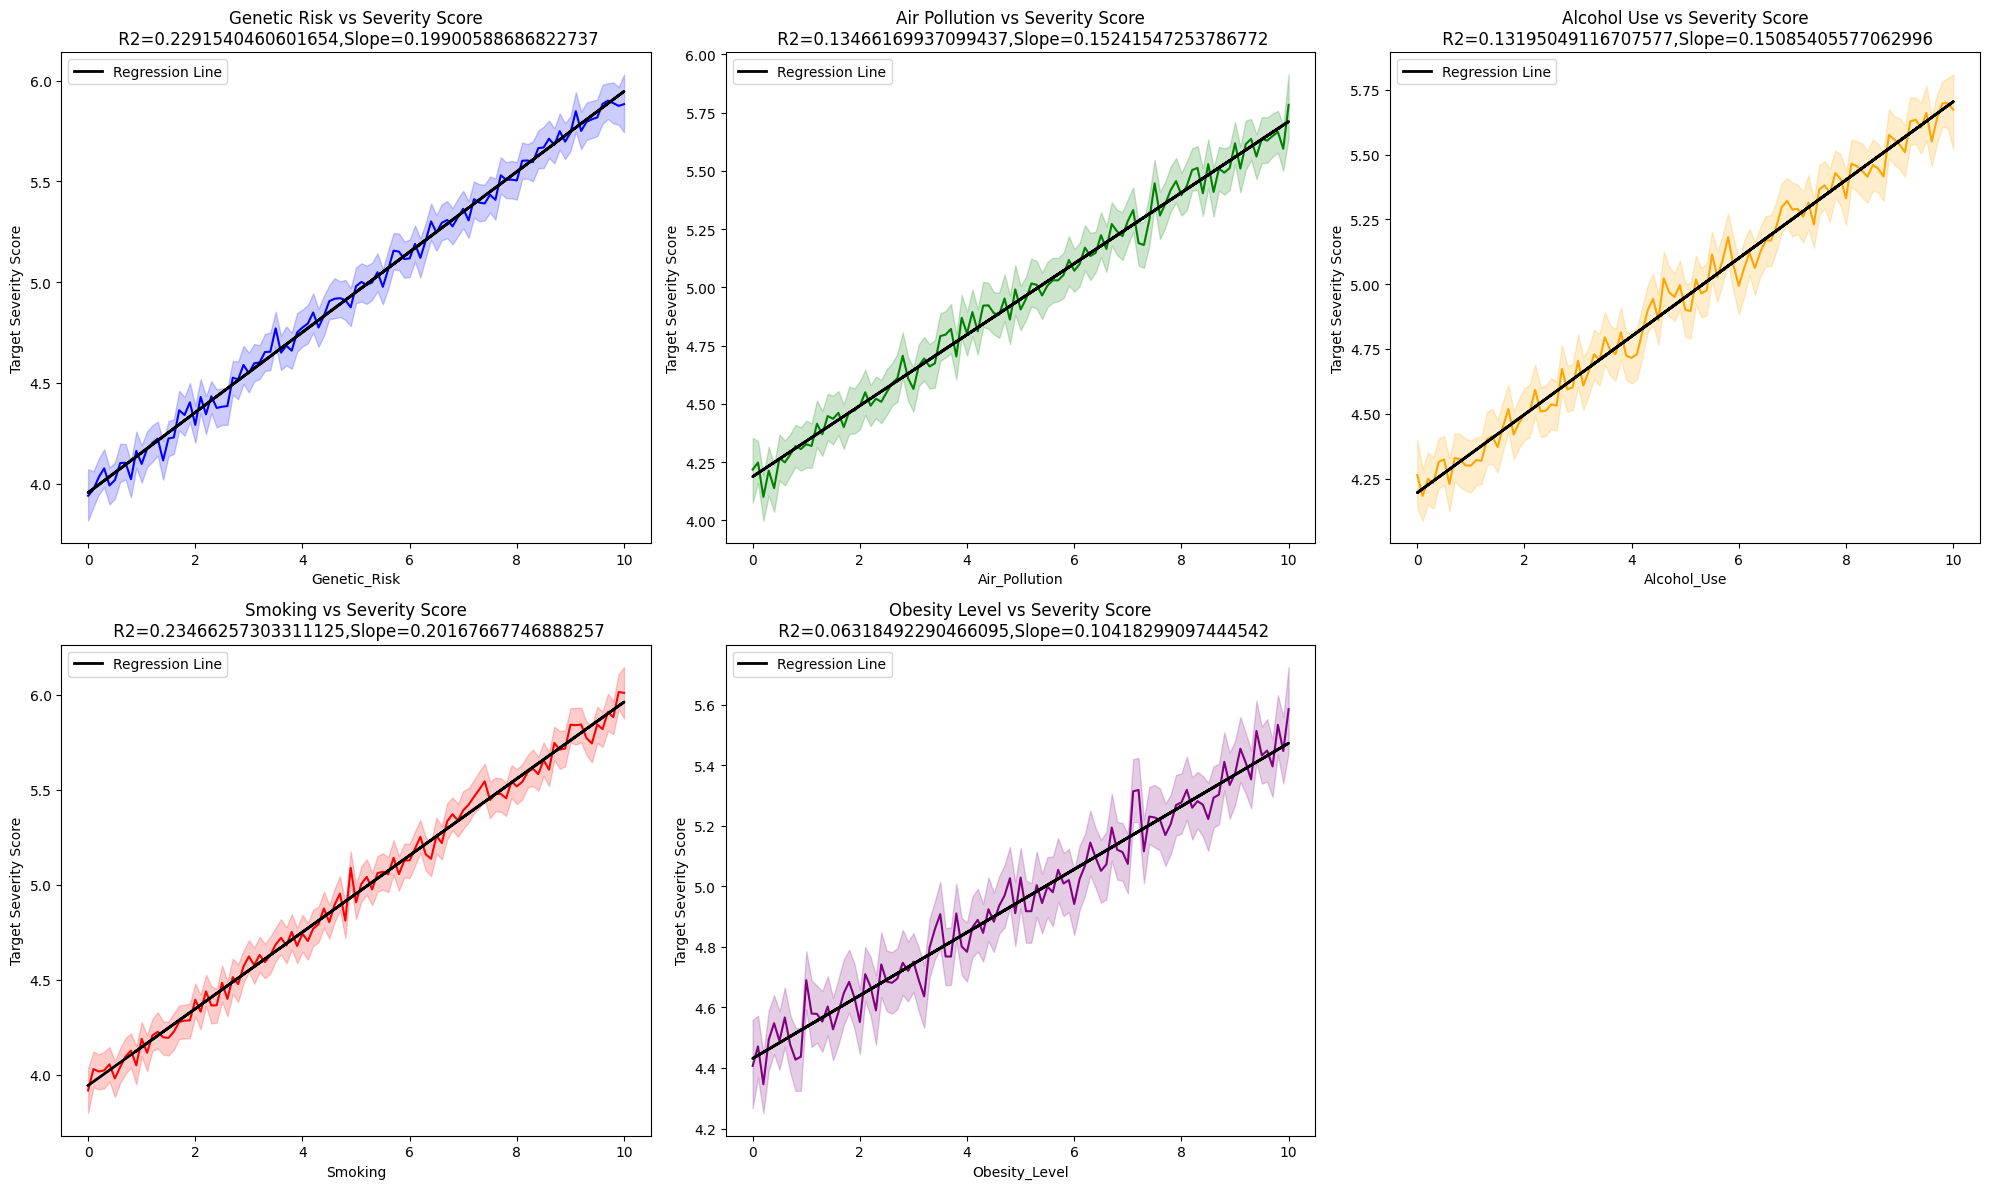

In [11]:
from scipy.stats import linregress

risk_factors = ['Genetic_Risk','Air_Pollution','Alcohol_Use','Smoking','Obesity_Level']
titles = ['Genetic Risk','Air Pollution','Alcohol Use','Smoking','Obesity Level']
colors = ['blue','green', 'orange','red','purple']

plt.figure(figsize = (20,12))
for i, (factor, title, color) in enumerate(zip(risk_factors, titles, colors), 1):
    plt.subplot(2,3,i)

    x=data[factor]
    y=data['Target_Severity_Score']
    slope, intercept, r_value, p_value, std_err = linregress(x,y)
    r_squared = r_value**2

    sns.lineplot(x=factor, y='Target_Severity_Score', data=data,color=color)
    plt.plot(x,x*slope+intercept, color='black', linewidth=2,label='Regression Line')
    plt.title(f"{title} vs Severity Score\n R2={r_squared},Slope={slope}")
    plt.xlabel(factor)
    plt.ylabel("Target Severity Score")
    plt.legend()

plt.tight_layout()
plt.show()

# 2- Analyze the proportion of eraly-stage diagnoses by cancer type

In [67]:
data["Cancer_Type"].value_counts()

Cancer_Type
Colon       6376
Prostate    6308
Leukemia    6266
Liver       6249
Skin        6231
Cervical    6222
Breast      6189
Lung        6159
Name: count, dtype: int64

In [70]:
stage_count = data[data['Cancer_Type'] == 'Lung']['Cancer_Stage'].value_counts()
early_stage_sum = stage_count.get('Stage 0', 0) + stage_count.get('Stage I', 0)
total_sum = stage_count.sum()
proportion = (early_stage_sum/total_sum)*100
print(f"proportion of Lungs cancer diagnosed at stage 0 and stage 1 :{proportion}")

proportion of Lungs cancer diagnosed at stage 0 and stage 1 :38.43156356551388


In [72]:
stage_count = data[data['Cancer_Type'] == 'Colon']['Cancer_Stage'].value_counts()
early_stage_sum = stage_count.get('Stage 0', 0) + stage_count.get('Stage I', 0)
total_sum = stage_count.sum()
proportion = (early_stage_sum/total_sum)*100
print(f"proportion of Colon cancer diagnosed at stage 0 and stage 1 :{proportion}")

proportion of Colon cancer diagnosed at stage 0 and stage 1 :40.41718946047679


In [73]:
stage_count = data[data['Cancer_Type'] == 'Prostate']['Cancer_Stage'].value_counts()
early_stage_sum = stage_count.get('Stage 0', 0) + stage_count.get('Stage I', 0)
total_sum = stage_count.sum()
proportion = (early_stage_sum/total_sum)*100
print(f"proportion of Prostate cancer diagnosed at stage 0 and stage 1 :{proportion}")

proportion of Prostate cancer diagnosed at stage 0 and stage 1 :40.187064045656314


In [74]:
stage_count = data[data['Cancer_Type'] == 'Leukemia']['Cancer_Stage'].value_counts()
early_stage_sum = stage_count.get('Stage 0', 0) + stage_count.get('Stage I', 0)
total_sum = stage_count.sum()
proportion = (early_stage_sum/total_sum)*100
print(f"proportion of Leukemia cancer diagnosed at stage 0 and stage 1 :{proportion}")

proportion of Leukemia cancer diagnosed at stage 0 and stage 1 :39.53080114905841


In [76]:
stage_count = data[data['Cancer_Type'] == 'Skin']['Cancer_Stage'].value_counts()
early_stage_sum = stage_count.get('Stage 0', 0) + stage_count.get('Stage I', 0)
total_sum = stage_count.sum()
proportion = (early_stage_sum/total_sum)*100
print(f"proportion of Skin cancer diagnosed at stage 0 and stage 1 :{proportion}")

proportion of Skin cancer diagnosed at stage 0 and stage 1 :40.41084898090194


In [77]:
stage_count = data[data['Cancer_Type'] == 'Cervical']['Cancer_Stage'].value_counts()
early_stage_sum = stage_count.get('Stage 0', 0) + stage_count.get('Stage I', 0)
total_sum = stage_count.sum()
proportion = (early_stage_sum/total_sum)*100
print(f"proportion of Cervical cancer diagnosed at stage 0 and stage 1 :{proportion}")

proportion of Cervical cancer diagnosed at stage 0 and stage 1 :39.85856637737062


In [78]:
stage_count = data[data['Cancer_Type'] == 'Breast']['Cancer_Stage'].value_counts()
early_stage_sum = stage_count.get('Stage 0', 0) + stage_count.get('Stage I', 0)
total_sum = stage_count.sum()
proportion = (early_stage_sum/total_sum)*100
print(f"proportion of Breast cancer diagnosed at stage 0 and stage 1 :{proportion}")

proportion of Breast cancer diagnosed at stage 0 and stage 1 :39.47325900791727


In [79]:
stage_count = data[data['Cancer_Type'] == 'Liver']['Cancer_Stage'].value_counts()
early_stage_sum = stage_count.get('Stage 0', 0) + stage_count.get('Stage I', 0)
total_sum = stage_count.sum()
proportion = (early_stage_sum/total_sum)*100
print(f"proportion of Liver cancer diagnosed at stage 0 and stage 1 :{proportion}")

proportion of Liver cancer diagnosed at stage 0 and stage 1 :40.614498319731155


#### Across all cancer types, only about 38–41% of cases are being detected early.
#### This means:
#### Nearly 60% of cancers are still being diagnosed at later stages (Stage II, III, IV).
#### This indicates gaps in early screening, awareness, or detection effectiveness.

#### Most cancers in the dataset (about 60%) are diagnosed only after they progress beyond early stages.
#### Early detection rates remain consistently low (38–41%) across all cancer types, indicating limited screening coverage, low awareness, or delayed symptom recognition.
#### Lung cancer shows the worst early detection, while liver, skin, and prostate cancers show slightly better—but still not satisfactory—early-stage diagnosis rates.

# 3- Identity key predictors of cancer severity and survival years

In [86]:
features = ['Age','Genetic_Risk','Air_Pollution','Alcohol_Use','Smoking','Obesity_Level']
targets = ['Survival_Years','Target_Severity_Score']

# calculate correaltions
person_corr = data[features+targets].corr(method='pearson')
spearman_corr = data[features+targets].corr(method='spearman')

# slice out only the relatiosnship with target value
person_result = person_corr[targets]
spearman_result=spearman_corr[targets]

In [88]:
# combine both

correaltion_df = pd.concat([person_result,spearman_result], axis=1, keys=['Pearson','Spearman'])
correaltion_df

Pearson                             Spearman  \
                      Survival_Years Target_Severity_Score Survival_Years   
Age                        -0.000147             -0.001481      -0.000149   
Genetic_Risk                0.001708              0.478700       0.001684   
Air_Pollution               0.000893              0.366963       0.000841   
Alcohol_Use                -0.000527              0.363250      -0.000543   
Smoking                     0.001371              0.484420       0.001372   
Obesity_Level               0.009771              0.251366       0.009780   
Survival_Years              1.000000              0.004161       1.000000   
Target_Severity_Score       0.004161              1.000000       0.003431   

                                             
                      Target_Severity_Score  
Age                               -0.002076  
Genetic_Risk                       0.472193  
Air_Pollution                      0.357528  
Alcohol_Use                        0.354694  
Smoking                            0.477881  
Obesity_Level                      0.243152  
Survival_Years                     0.003431  
Target_Severity_Score              1.000000

In [13]:
# Random forest for target severity score

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score

# converting categorical columns to numerical columns
categorical_cols = ['Gender', 'Country_Region', 'Cancer_Type', 'Cancer_Stage']

for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

# preparing feature and input
x = data.drop(columns = ['Patient_ID','Survival_Years','Target_Severity_Score',"Treatment_Cost_USD"])
y_severity = data['Target_Severity_Score']


# train test split
X_train_s, X_test_s,y_train_s, y_test_s = train_test_split(x,y_severity, test_size=0.2,random_state=42)

# train the model
model  =RandomForestRegressor(n_estimators=200,max_depth=None,min_samples_split=2,min_samples_leaf=1,random_state=42)
model.fit(X_train_s, y_train_s)
# evaluate the model
train_r2_severity = r2_score(y_train_s, model.predict(X_train_s))
test_r2_severity = r2_score(y_test_s, model.predict(X_test_s))


In [109]:
print(train_r2_severity)
print(test_r2_severity)

0.96897461615871
0.7681801471535263


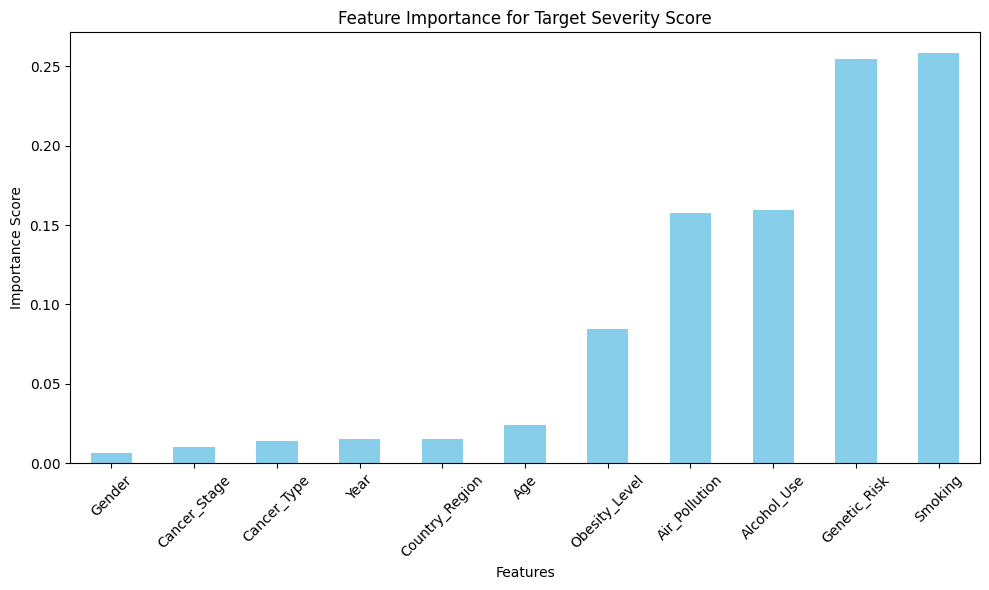

In [115]:
# Feature Importance for Severity Score
features_importance_severity = pd.Series(model.feature_importances_, index=x.columns).sort_values(ascending=True)

# Plotting important features
plt.figure(figsize=(10,6))
features_importance_severity.plot(kind="bar", color="skyblue")
plt.title("Feature Importance for Target Severity Score")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [10]:
# Random forest for target Survival_Years score

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV


# converting categorical columns to numerical columns
categorical_cols = ['Gender', 'Country_Region', 'Cancer_Type', 'Cancer_Stage']

for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

# preparing feature and input
x = data.drop(columns = ['Patient_ID','Survival_Years','Target_Severity_Score',"Treatment_Cost_USD"])
y_severity = data['Survival_Years']


# train test split
X_train_s, X_test_s,y_train_s, y_test_s = train_test_split(x,y_severity, test_size=0.2,random_state=42)

param_grid = {
    'n_estimators':[100,200],
    'max_depth':[5,10,None],
    'min_samples_split':[2,5],
    'min_samples_leaf':[1,2]
    
}

# train the model
model  =RandomForestRegressor(random_state=40)
GSC = GridSearchCV(model,param_grid ,cv=3, scoring="r2",n_jobs=-1)
GSC.fit(X_train_s, y_train_s)

best_rf_severity=GSC.best_estimator_

# model.fit(X_train_s, y_train_s)
# evaluate the model
train_r2_severity = r2_score(y_train_s, best_rf_severity.predict(X_train_s))
test_r2_severity = r2_score(y_test_s, best_rf_severity.predict(X_test_s))


In [13]:
# Poor perfromance 
print(train_r2_severity)
print(test_r2_severity)

0.008879326441712188
0.00018226405542554058


<Axes: xlabel='Survival_Years', ylabel='Count'>

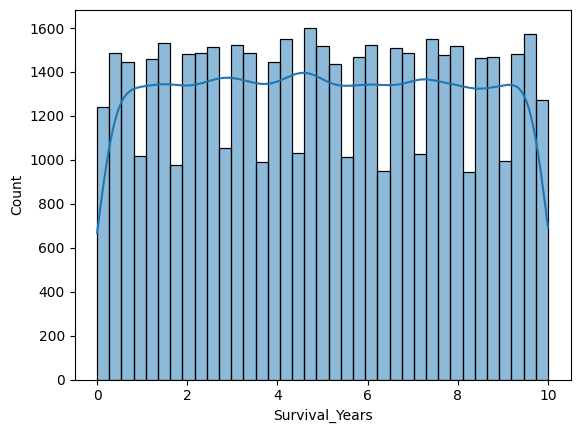

In [14]:
# checking noise and redundancy, data leackage
import seaborn as sns
sns.histplot(data["Survival_Years"],kde=True)

In [15]:
# relationship finding why model is not perfroming well 
data.corr(numeric_only=True)["Survival_Years"].sort_values(ascending=False)

Survival_Years           1.000000
Obesity_Level            0.009771
Country_Region           0.005121
Target_Severity_Score    0.004161
Genetic_Risk             0.001708
Smoking                  0.001371
Air_Pollution            0.000893
Year                     0.000018
Age                     -0.000147
Treatment_Cost_USD      -0.000429
Alcohol_Use             -0.000527
Cancer_Type             -0.001717
Cancer_Stage            -0.003014
Gender                  -0.007121
Name: Survival_Years, dtype: float64

### The information in your columns does not help the model fighure out how long our patient will survive

# 4 Explore the economic burden of the cancer treatment across different demographics and countries

,Patient_ID,Age,Gender,Country_Region,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
0,PT0000000,71,1,8,2021,6.4,2.8,9.5,0.9,8.7,5,3,62913.44,5.9,4.92
1,PT0000001,34,1,3,2021,1.3,4.5,3.7,3.9,6.3,3,0,12573.41,4.7,4.65
2,PT0000002,80,1,6,2023,7.4,7.9,2.4,4.7,0.1,0,2,6984.33,7.1,5.84
3,PT0000003,40,1,8,2015,1.7,2.9,4.8,3.5,2.7,2,1,67446.25,1.6,3.12
4,PT0000004,43,0,1,2017,5.1,2.8,2.3,6.7,0.5,7,3,77977.12,2.9,3.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,PT0049995,80,1,6,2023,2.3,7.5,2.8,3.8,2.9,3,0,71463.70,1.0,3.63
49996,PT0049996,40,0,9,2018,6.4,3.5,2.9,9.0,9.8,2,1,49619.66,0.4,6.03
49997,PT0049997,74,1,6,2015,6.2,1.6,8.7,4.7,4.0,0,0,5338.25,2.7,6.02
49998,PT0049998,21,1,1,2018,4.0,6.5,7.6,8.6,8.1,4,4,45100.47,7.5,6.54


In [19]:
# Load the Data

data = pd.read_csv("global_cancer_patients_2015_2024.csv")
data


,Patient_ID,Age,Gender,Country_Region,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
0,PT0000000,71,Male,UK,2021,6.4,2.8,9.5,0.9,8.7,Lung,Stage III,62913.44,5.9,4.92
1,PT0000001,34,Male,China,2021,1.3,4.5,3.7,3.9,6.3,Leukemia,Stage 0,12573.41,4.7,4.65
2,PT0000002,80,Male,Pakistan,2023,7.4,7.9,2.4,4.7,0.1,Breast,Stage II,6984.33,7.1,5.84
3,PT0000003,40,Male,UK,2015,1.7,2.9,4.8,3.5,2.7,Colon,Stage I,67446.25,1.6,3.12
4,PT0000004,43,Female,Brazil,2017,5.1,2.8,2.3,6.7,0.5,Skin,Stage III,77977.12,2.9,3.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,PT0049995,80,Male,Pakistan,2023,2.3,7.5,2.8,3.8,2.9,Leukemia,Stage 0,71463.70,1.0,3.63
49996,PT0049996,40,Female,USA,2018,6.4,3.5,2.9,9.0,9.8,Colon,Stage I,49619.66,0.4,6.03
49997,PT0049997,74,Male,Pakistan,2015,6.2,1.6,8.7,4.7,4.0,Breast,Stage 0,5338.25,2.7,6.02
49998,PT0049998,21,Male,Brazil,2018,4.0,6.5,7.6,8.6,8.1,Liver,Stage IV,45100.47,7.5,6.54


In [24]:
data["Age_Group"]=pd.cut(data['Age'],bins=[0,30,45,60,75,100], labels=["0-30",'31-45','46-60','61-75',"76+"])
data

,Patient_ID,Age,Gender,Country_Region,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Treatment_Cost_USD,Survival_Years,Target_Severity_Score,Age_Group
0,PT0000000,71,Male,UK,2021,6.4,2.8,9.5,0.9,8.7,Lung,Stage III,62913.44,5.9,4.92,61-75
1,PT0000001,34,Male,China,2021,1.3,4.5,3.7,3.9,6.3,Leukemia,Stage 0,12573.41,4.7,4.65,31-45
2,PT0000002,80,Male,Pakistan,2023,7.4,7.9,2.4,4.7,0.1,Breast,Stage II,6984.33,7.1,5.84,76+
3,PT0000003,40,Male,UK,2015,1.7,2.9,4.8,3.5,2.7,Colon,Stage I,67446.25,1.6,3.12,31-45
4,PT0000004,43,Female,Brazil,2017,5.1,2.8,2.3,6.7,0.5,Skin,Stage III,77977.12,2.9,3.62,31-45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,PT0049995,80,Male,Pakistan,2023,2.3,7.5,2.8,3.8,2.9,Leukemia,Stage 0,71463.70,1.0,3.63,76+
49996,PT0049996,40,Female,USA,2018,6.4,3.5,2.9,9.0,9.8,Colon,Stage I,49619.66,0.4,6.03,31-45
49997,PT0049997,74,Male,Pakistan,2015,6.2,1.6,8.7,4.7,4.0,Breast,Stage 0,5338.25,2.7,6.02,61-75
49998,PT0049998,21,Male,Brazil,2018,4.0,6.5,7.6,8.6,8.1,Liver,Stage IV,45100.47,7.5,6.54,0-30


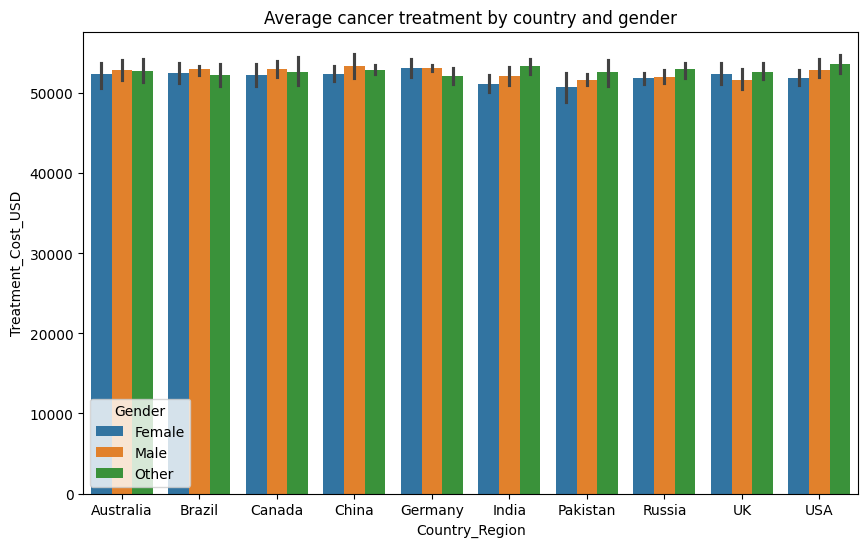

In [32]:
country_age_cost = data.groupby(["Country_Region","Age_Group","Gender"])["Treatment_Cost_USD"].mean().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=country_age_cost, x="Country_Region", y="Treatment_Cost_USD",hue="Gender")
plt.title("Average cancer treatment by country and gender")
plt.show()

In [33]:
country_age_cost = data.groupby(["Country_Region","Age_Group"])["Treatment_Cost_USD"].mean().reset_index()

In [34]:
heatmap_data = country_age_cost.pivot(index="Age_Group",columns="Country_Region",values="Treatment_Cost_USD")

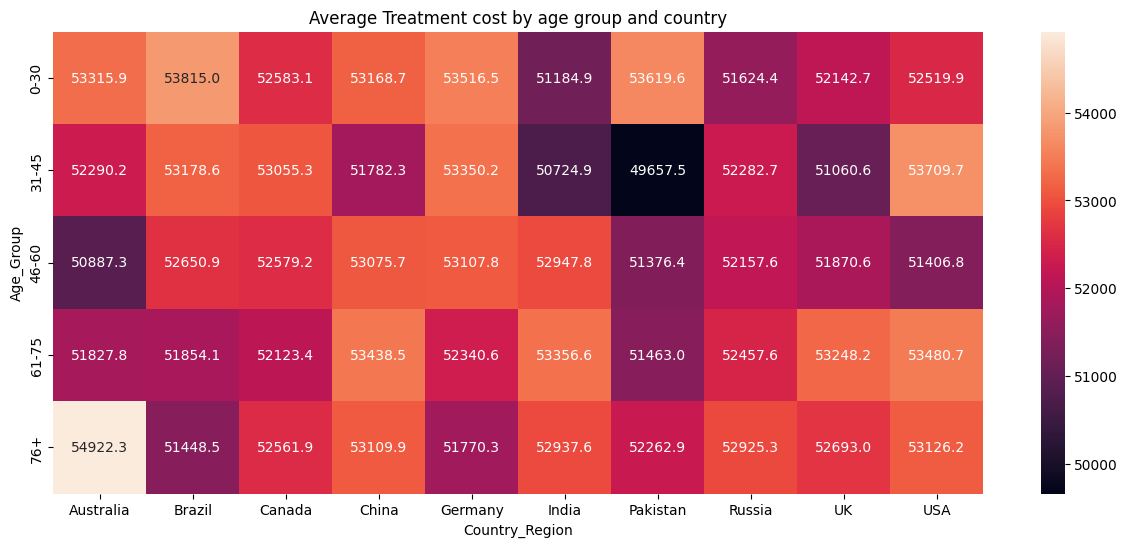

In [43]:
plt.figure(figsize=(15,6))
sns.heatmap(heatmap_data, annot=True,fmt=".1f")
plt.title("Average Treatment cost by age group and country")
plt.show()

# Geographic Disparities in Economic Burden
### Cancer treatment costs are significantly higher in developed nations such as the USA, Australia, and China, revealing the heavy financial load in advanced healthcare systems. Meanwhile, countries like India and Pakistan exhibit comparatively lower costs, likely due to lower healthcare pricing structures or limited access to advanced treatment. This highlights a clear global inequality in healthcare affordability that can intensify financial strain depending on a patient’s country of residence.

# Gender-Based Cost Patterns Are Uniform
### Across all countries, gender-based differences in average treatment costs are minimal, suggesting no major gender bias in pricing or access to cancer care. This uniformity may reflect standardization in treatment protocols or equitable healthcare policies, but it also points to the fact that the financial impact of cancer is universal across genders.

# Age-Related Escalation in Treatment Costs
### Treatment costs tend to rise with age, particularly for those aged 61 and above. This trend is especially evident in countries like Australia and the USA, where older age groups face sharply higher costs. The increased financial burden in these groups could be due to more intensive care needs, multiple comorbidities, or prolonged treatments. This pattern underlines the vulnerability of elderly populations and the pressing need for targeted support for senior citizens.

# Role of Healthcare Systems in Cost Variation
### Countries with robust public healthcare systems—such as Canada, Germany, and the UK—show relatively stable treatment costs across age groups, reflecting the benefits of healthcare subsidies or coverage. This consistency reinforces the importance of government intervention and universal healthcare in mitigating financial disparities in cancer treatment.

# 5 Assess whether higher treatment cost is associated with longer survival

### Null Hypothesis (Ho) :- There is no corelation between treatment cost and survival years.
###  Alternative Hypothessis (H2):-- There is a corelation (+ve, _ve) between treatment cost and survival years

In [51]:
# hypothesis
from scipy.stats import pearsonr, spearmanr

x = data['Treatment_Cost_USD']
y = data['Survival_Years']

# Performing pearson corelation test
perason_corr, pearson_p = pearsonr(x,y)
print(f"Pearson correlation coefiicient: {perason_corr}")
print(f"Pearson P_value: {pearson_p}")

# spearman corelation test
spearman_corr, spearman_p = spearmanr(x,y)
print(f"Pearson correlation coefiicient: {perason_corr}")
print(f"Pearson P_value: {pearson_p}")

alpha = 0.05

def interpret_corr(corr, p , method):
    if p<alpha:
        print(f"{method} , we reject the null hypothesis")
    else:
        print(f"{method} , we failed to reject null hyphotheisis")

interpret_corr(perason_corr,pearson_p,"pearson")
interpret_corr(spearman_corr,spearman_p,"Spearman")

Pearson correlation coefiicient: -0.0004294054283021519
Pearson P_value: 0.9235082012963307
Pearson correlation coefiicient: -0.0004294054283021519
Pearson P_value: 0.9235082012963307
pearson , we failed to reject null hyphotheisis
Spearman , we failed to reject null hyphotheisis


<Axes: xlabel='Treatment_Cost_USD', ylabel='Survival_Years'>

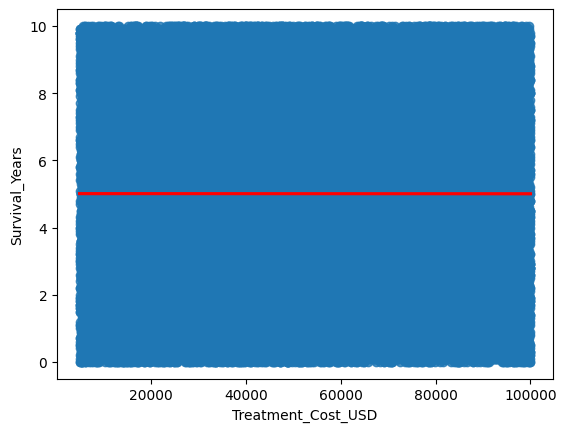

In [57]:
sns.regplot(x=x,y=y, line_kws={'color':'red'})

### There is no corelatiom  between Treatment_Cost_USD  and Survival_Years

# 6 -Evaluate if higher cnacer stages lead to greater treatment costs and reduced survival years 

In [58]:
df = data.copy()

In [60]:
df.head(3)

,Patient_ID,Age,Gender,Country_Region,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Treatment_Cost_USD,Survival_Years,Target_Severity_Score,Age_Group
0,PT0000000,71,Male,UK,2021,6.4,2.8,9.5,0.9,8.7,Lung,Stage III,62913.44,5.9,4.92,61-75
1,PT0000001,34,Male,China,2021,1.3,4.5,3.7,3.9,6.3,Leukemia,Stage 0,12573.41,4.7,4.65,31-45
2,PT0000002,80,Male,Pakistan,2023,7.4,7.9,2.4,4.7,0.1,Breast,Stage II,6984.33,7.1,5.84,76+


In [61]:
stage_order = ["Stage 0","Stage I","Stage II","Stage III","Stage IV"]

In [64]:
grouped_stats = df.groupby("Cancer_Stage")[['Treatment_Cost_USD','Survival_Years']].mean().reset_index()

In [65]:
grouped_stats

,Cancer_Stage,Treatment_Cost_USD,Survival_Years
0,Stage 0,52572.589493,5.015199
1,Stage I,52674.079638,5.012990
2,Stage II,52082.841258,4.995170
3,Stage III,52708.197506,5.036311
4,Stage IV,52302.471041,4.972596


In [ ]:
Treatment Cost Vs cancer stages
Null hypothesis 
Alternative hypothesis

survival years vs cancer stage
Null hypothesis 
Alternative hypothesis

In [66]:
grouped_cost=[]
grouped_survival=[]

for stage in stage_order:
    stage_data = df[df['Cancer_Stage']==stage]
    cost = stage_data['Treatment_Cost_USD']
    survival = stage_data['Survival_Years']
    grouped_cost.append(cost)
    grouped_survival.append(survival)

In [67]:
len(grouped_cost)

5

In [71]:
# check for normality
from scipy.stats import shapiro, f_oneway

noraml_cost=0
normal_survival=0
for i in range(len(stage_order)):
    cost_p = shapiro(grouped_cost[i]).pvalue
    surv_p = shapiro(grouped_survival[i]).pvalue

    print(f"cost {cost_p} for group {i}")
    print(f"survival {surv_p} for group {i}")

    if cost_p<0.05:
        noraml_cost+=1
    if surv_p<0.05:
        normal_survival +=1

print(cost_p)
print(surv_p)

cost 1.5471821061637387e-47 for group 0
survival 1.6291039522109283e-47 for group 0
cost 7.306523956943449e-48 for group 1
survival 7.575551046262835e-48 for group 1
cost 8.943579643045432e-48 for group 2
survival 4.041659465829021e-48 for group 2
cost 5.267270033024548e-48 for group 3
survival 1.3648520457950436e-47 for group 3
cost 1.583864018957793e-47 for group 4
survival 2.299259828983219e-47 for group 4
1.583864018957793e-47
2.299259828983219e-47


In [73]:
print(noraml_cost)
print(normal_survival)

5
5


In [74]:
from scipy.stats import kruskal


In [76]:
kruskal_cost = kruskal(*grouped_cost)
kruskal_survival = kruskal(*grouped_survival)

p_cost = kruskal_cost.pvalue
p_survival = kruskal_survival.pvalue

In [77]:
p_cost

np.float64(0.4254451689062656)

In [78]:
p_survival

np.float64(0.6033078729984223)

## === Kruskal–Wallis Test: Treatment Cost across Cancer Stages ===
### P-value: 0.4254
## Conclusion: No significant difference in treatment costs among cancer stages.
## === Kruskal–Wallis Test: Survival Years across Cancer Stages ===
### P-value: 0.6033
## Conclusion: No significant difference in survival years among cancer stages.